# Understanding Band Data

In [1]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Let's load a file and see the keys

In [29]:
#example = "../FULL_MATPEDIA_DATA/bands/2dm-2004.json"

# Henry's path
example = "../MPhys_Project/data extraction+fingerprinting/FULL_MATPEDIA_DATA/bands/2dm-350.json"

bands_dict=json.load(open(example))

for key in bands_dict:
    print(key)
print(bands_dict["efermi"])

is_spin_polarized
branches
kpoints
is_metal
vbm
@module
efermi
labels_dict
@class
lattice_rec
bands
band_gap
cbm
structure
projections
-2.94145735


## Understanding The K-Space
The third K-space coordinate always equals zero, as we are in 2D.

In [12]:
bands_dict["labels_dict"]

{'\\Gamma': [-0.0, -0.0, 0.0], 'M': [0.5, 0.5, 0.0], 'X': [0.0, 0.5, 0.0]}

In [13]:
bands_dict["branches"]

[{'name': '\\Gamma-X', 'start_index': 0, 'end_index': 20},
 {'name': 'X-M', 'start_index': 21, 'end_index': 41},
 {'name': 'M-\\Gamma', 'start_index': 42, 'end_index': 62}]

In [15]:
bands_dict["kpoints"][21: 41]

[[0.0, 0.5, 0.0],
 [0.025, 0.5, 0.0],
 [0.05, 0.5, 0.0],
 [0.075, 0.5, 0.0],
 [0.1, 0.5, 0.0],
 [0.125, 0.5, 0.0],
 [0.15, 0.5, 0.0],
 [0.175, 0.5, 0.0],
 [0.2, 0.5, 0.0],
 [0.225, 0.5, 0.0],
 [0.25, 0.5, 0.0],
 [0.275, 0.5, 0.0],
 [0.3, 0.5, 0.0],
 [0.325, 0.5, 0.0],
 [0.35, 0.5, 0.0],
 [0.375, 0.5, 0.0],
 [0.4, 0.5, 0.0],
 [0.425, 0.5, 0.0],
 [0.45, 0.5, 0.0],
 [0.475, 0.5, 0.0]]

## Understanding the Band Structures
Each row doesn't correspond with a band necessarily!

In [55]:
bands = np.array(bands_dict["bands"]["1"])
bands

array([[-35.3944, -35.3943, -35.3943, ..., -35.3943, -35.3943, -35.3944],
       [-19.3449, -19.3451, -19.3457, ..., -19.3455, -19.3451, -19.3449],
       [-19.1283, -19.1381, -19.1595, ..., -19.153 , -19.1358, -19.1283],
       ...,
       [  5.2997,   5.4495,   5.6724, ...,   5.5807,   5.4188,   5.2997],
       [  5.6043,   5.6317,   5.7176, ...,   5.6953,   5.6251,   5.6043],
       [  5.6313,   5.6564,   5.7624, ...,   5.6979,   5.6507,   5.6313]])

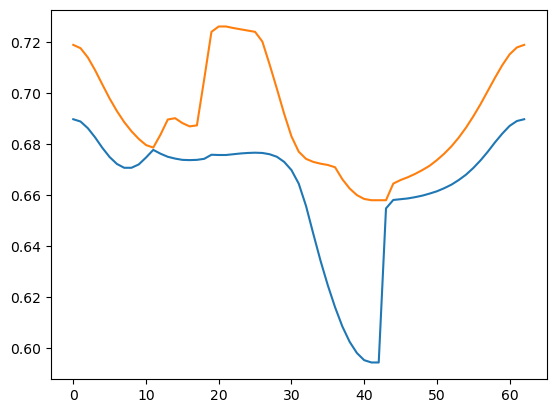

In [26]:
plt.plot(bands[29]-bands_dict["efermi"])
plt.plot(bands[30]-bands_dict["efermi"])

In [1]:
fig, ax = plt.subplots()
ax.set_ylim([-8, 8])
for band in bands:
    ax.plot(band)

NameError: name 'plt' is not defined

In [74]:
def calc_gamma_fingerprint(bands_dict):
    band_energies = np.array(bands_dict["bands"]["1"]) - bands_dict["efermi"]
    band_energies_gamma = band_energies[:, 0]
    counts, edges = np.histogram(band_energies_gamma, bins=32, range=[-4, 4])
    density = counts / len(band_energies_gamma)
    return density
    

In [77]:
calc_gamma_fingerprint(bands_dict)

array([0.        , 0.        , 0.        , 0.01666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01666667,
       0.03333333, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.1       , 0.03333333,
       0.03333333, 0.        , 0.        , 0.03333333, 0.        ,
       0.        , 0.03333333, 0.        , 0.01666667, 0.03333333,
       0.        , 0.01666667])